# Lecture 13

In [3]:
import matplotlib.pyplot as plt

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/01/99_matplotlib_structure-1.png" width="400">

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

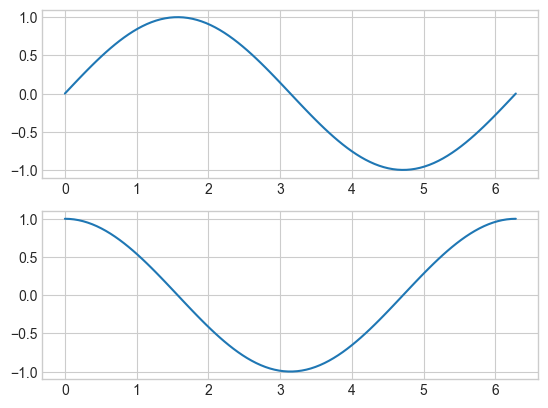

In [69]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(211) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

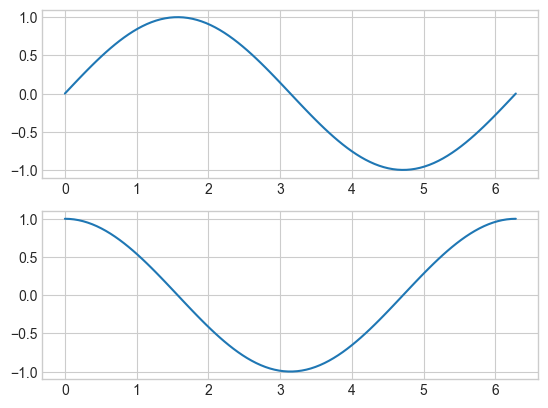

In [70]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

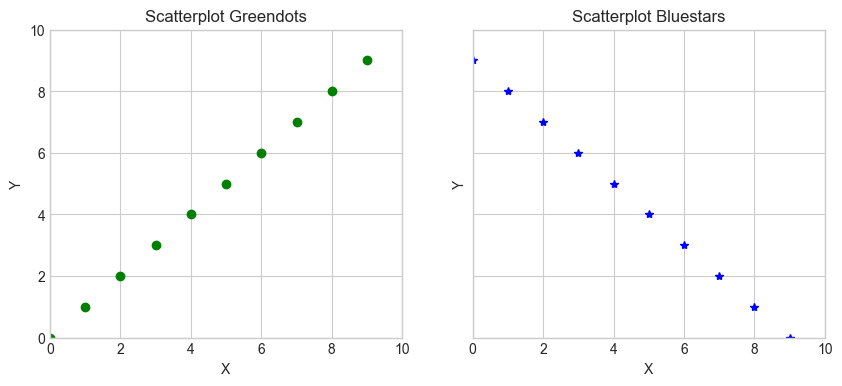

In [62]:
# Create Figure and Subplots
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)

# Plot
ax[0].plot(np.arange(10),np.arange(10), 'go')  # greendots
ax[1].plot(np.arange(10),np.arange(10)[::-1], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax[0].set_title('Scatterplot Greendots');ax[1].set_title('Scatterplot Bluestars')
ax[0].set_xlabel('X');  ax[1].set_xlabel('X')  # x label
ax[0].set_ylabel('Y');  ax[1].set_ylabel('Y')  # y label
ax[0].set_xlim(0, 10) ;  ax[1].set_xlim(0, 10)   # x axis limits
ax[0].set_ylim(0, 10);  ax[1].set_ylim(0, 10);  # y axis limits

#plt.tight_layout()


Setting `sharey=True` in `plt.subplots()` shares the Y axis between the two subplots.

And `dpi=12`0 increased the number of dots per inch of the plot to make it look more sharp and clear. You will notice a distinct improvement in clarity on increasing the dpi especially in jupyter notebooks.

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
We will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.


# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.

In [ ]:
plt.style.use('seaborn-whitegrid')


For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

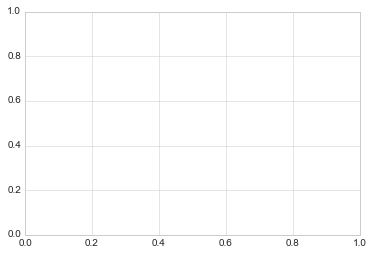

In [21]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Usually the variable name ``fig`` in used to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

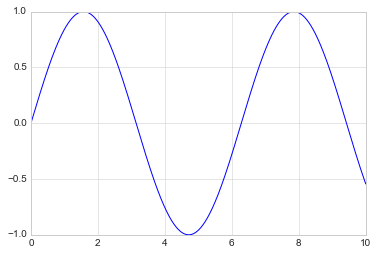

In [22]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));


Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

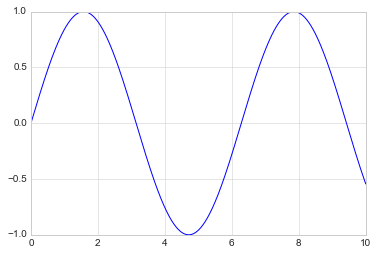

In [23]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

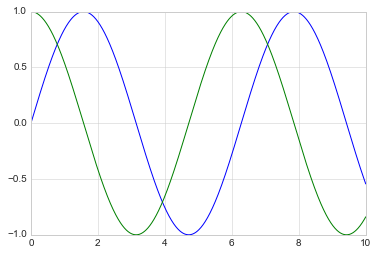

In [24]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

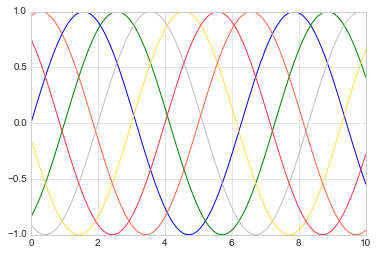

In [119]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='tomato'); # all HTML color names supported

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/01/matplotlib_colors-min.png" width="550">

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

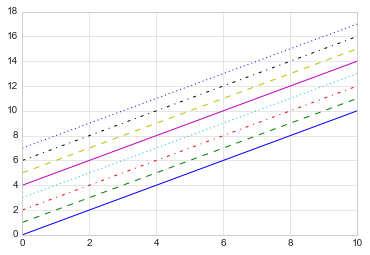

In [124]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

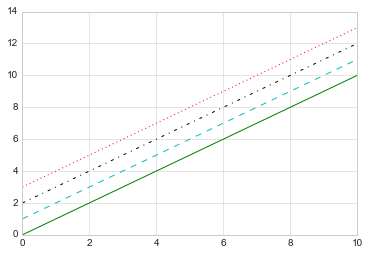

In [31]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, 'r:');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using IPython's help tools.

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

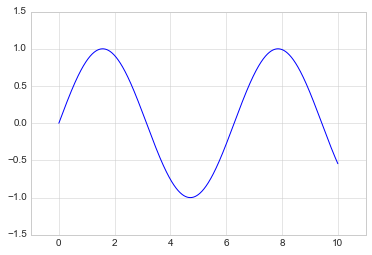

In [32]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

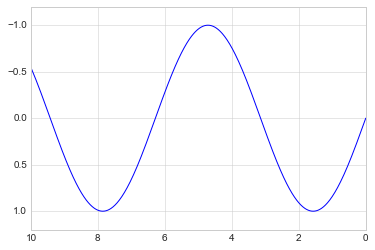

In [33]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()``.
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

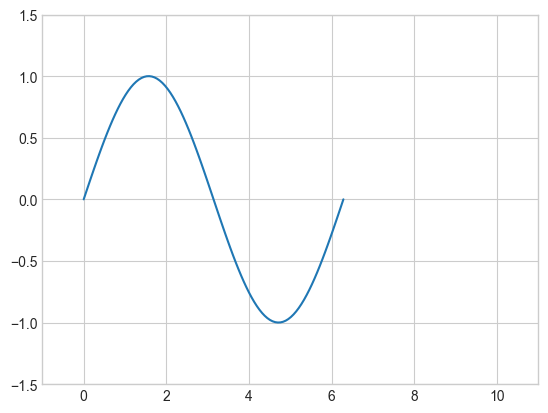

In [72]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

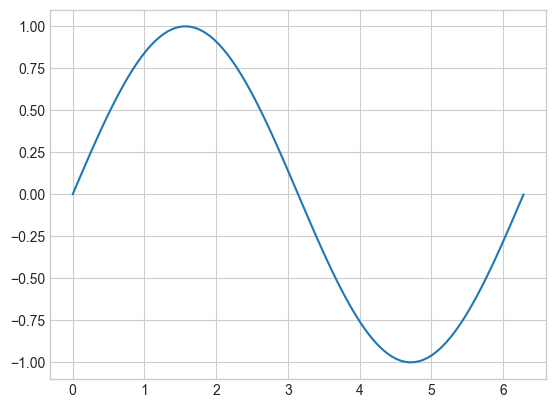

In [73]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

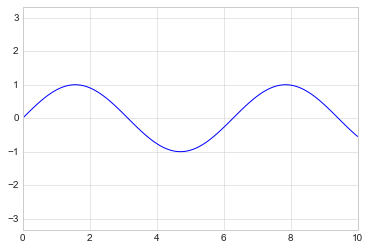

In [126]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

In [37]:
plt.axis?

## Labeling Plots


Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

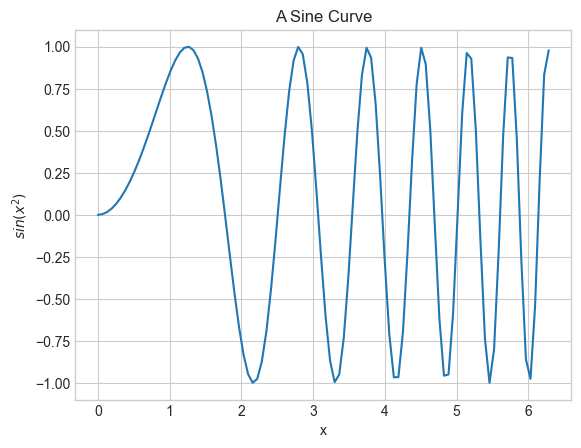

In [74]:
plt.plot(x, np.sin(x**2))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("$sin(x^2)$");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the ``plt.legend()`` method.
Though there are several valid ways of using this, it easiest to specify the label of each line using the ``label`` keyword of the plot function:

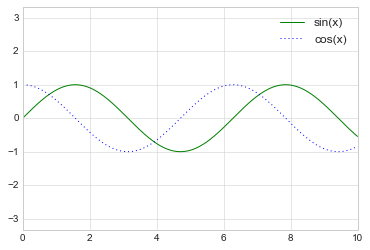

In [41]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring.



While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

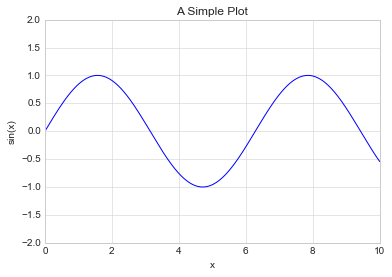

In [42]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

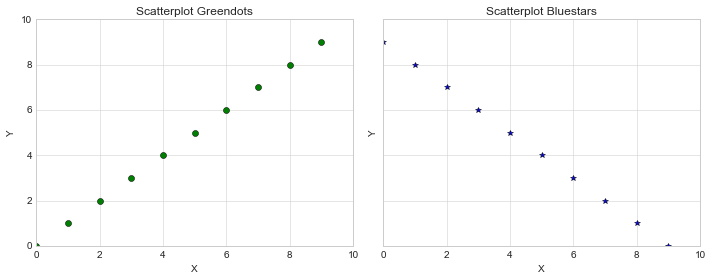

In [115]:
# Create Figure and Subplots
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)

# Plot
ax[0].plot(np.arange(10),np.arange(10), 'go')  # greendots
ax[1].plot(np.arange(10),np.arange(10)[::-1], 'b*')  # bluestart


ax[0].set(title='Scatterplot Greendots', xlabel='X', ylabel='Y', xlim=(0, 10), ylim=(0, 10))
ax[1].set(title='Scatterplot Bluestars', xlabel='X', ylabel='Y', xlim=(0, 10), ylim=(0, 10))
plt.tight_layout();

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

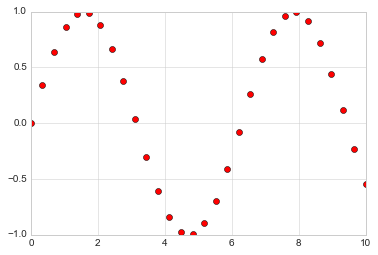

In [44]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'ro');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

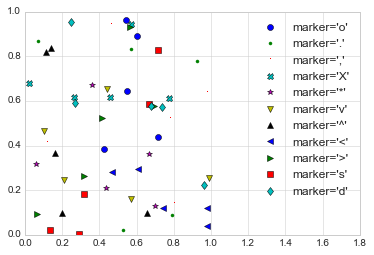

In [45]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'X', '*', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

In [46]:
# getting help
plt.plot?

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

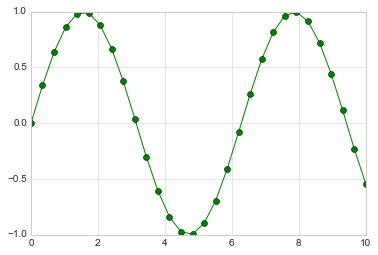

In [48]:
plt.plot(x, y, '-og');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

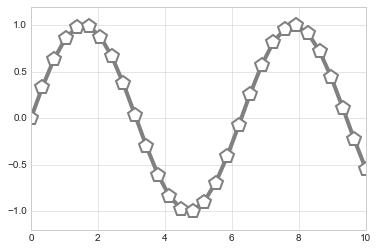

In [49]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

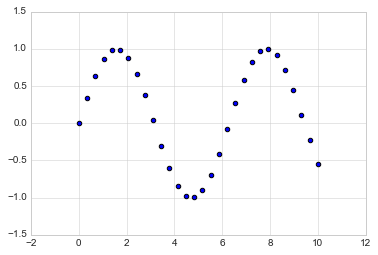

In [50]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

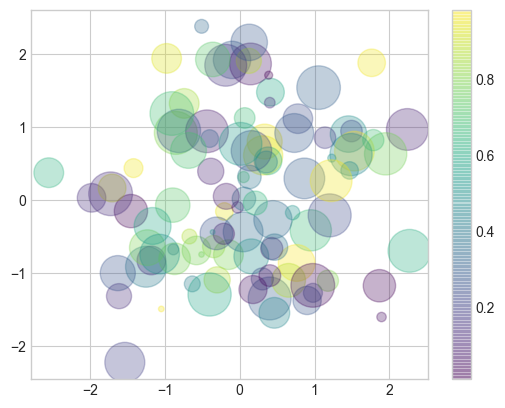

In [80]:
rng = np.random.RandomState(0)
x = rng.standard_normal(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.



## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

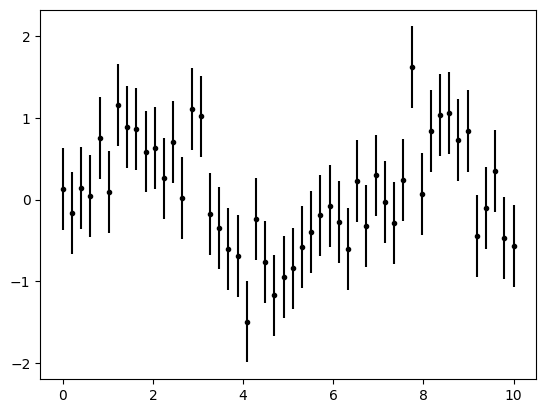

In [10]:
x = np.linspace(0, 10, 50)
dy = 0.5
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy,  fmt='.k');# fmt='none'

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``.

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

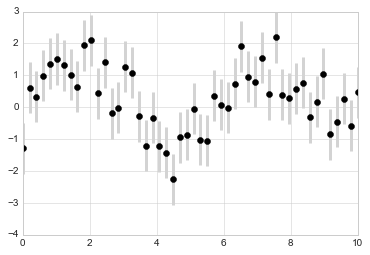

In [55]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

In [142]:
plt.bar?

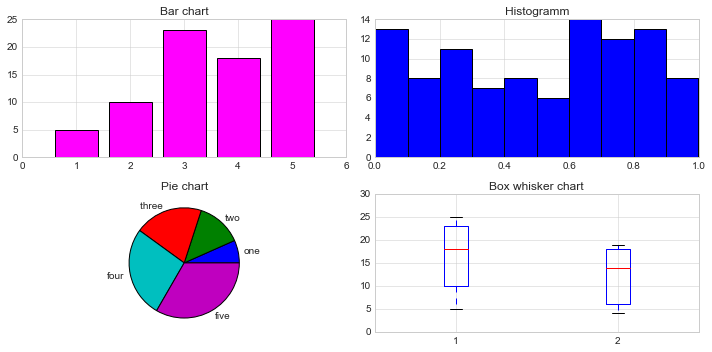

In [156]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))


s = ['one','two','three ','four' ,'five']
x = [1, 2, 3, 4, 5]
z = np.random.random(100)
z1 = [5, 10, 23, 18, 25]
z2 = [4, 6, 18, 14, 19]


ax[0,0].bar(x, z1,  color='magenta')
ax[0,0].set_title('Bar chart')

ax[0,1].hist(z)
ax[0,1].set_title('Histogramm')

ax[1,0].pie(x, labels=s)
ax[1,0].set_title('Pie chart')

ax[1,1].boxplot([z1, z2])
ax[1,1].set(title='Box whisker chart',ylim=[0,30])

fig.tight_layout()

### Creating several axes in one figure

In order to draw several graphs, we need to indicate how many lines we want in our graphs and how many columns. 
To do this, we should call the `subplots` method and give two parameters. The first is `nrows` how many rows we want and the second is `ncols`.

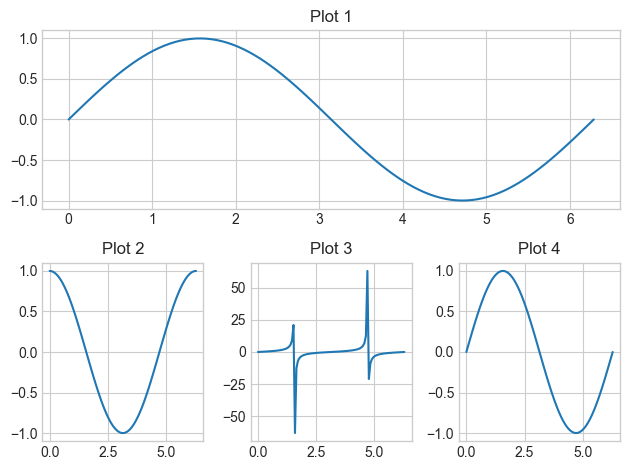

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Генерація даних для графіків
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Створення графіка з двома рядками
plt.subplot(2, 1, 1)  # (кількість рядків, кількість стовпців, номер графіка)
plt.plot(x, y1)
plt.title('Plot 1')

# Створення графіків у другому рядку
plt.subplot(2, 3, 4)
plt.plot(x, y2)
plt.title('Plot 2')

plt.subplot(2, 3, 5)
plt.plot(x, y3)
plt.title('Plot 3')

plt.subplot(2, 3, 6)
plt.plot(x, y1)
plt.title('Plot 4')

# Відображення графіків
plt.tight_layout()
plt.show()

In [93]:
x = np.linspace(-5,5,100)

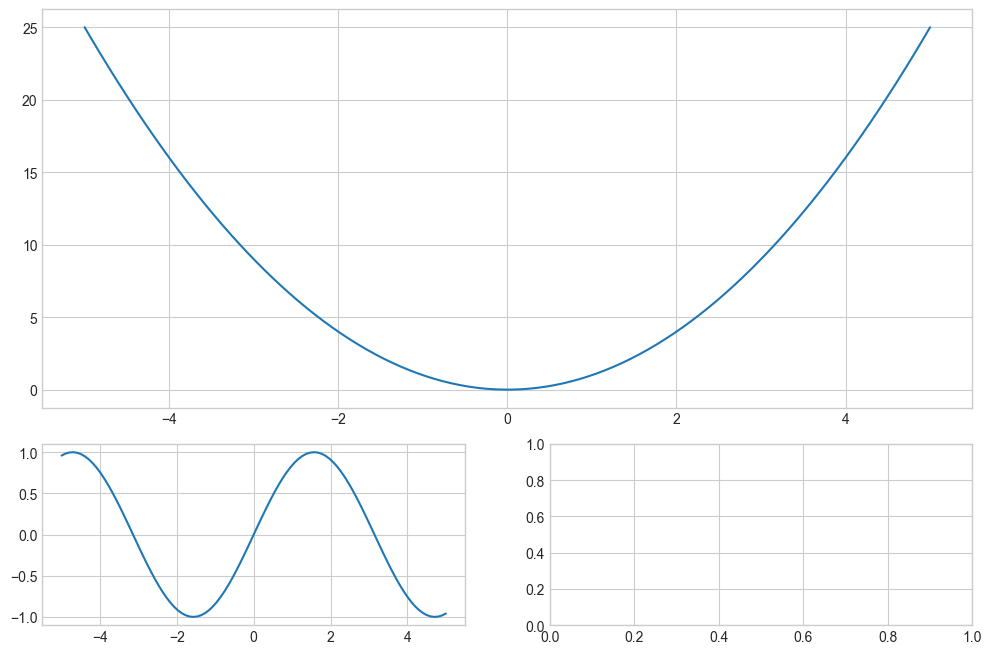

In [96]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.plot(x, x**2)
ax2.plot(x,np.sin(x))

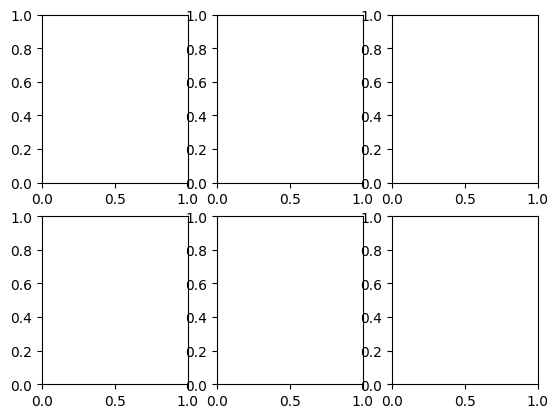

In [8]:
# from numpy.random import exponential
fig, axes = plt.subplots(nrows=2, ncols=3)

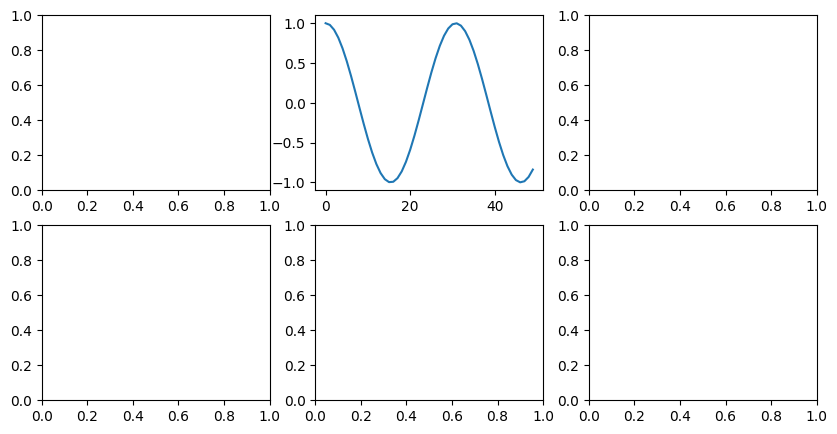

In [11]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axis[0,1].plot(np.cos(x));

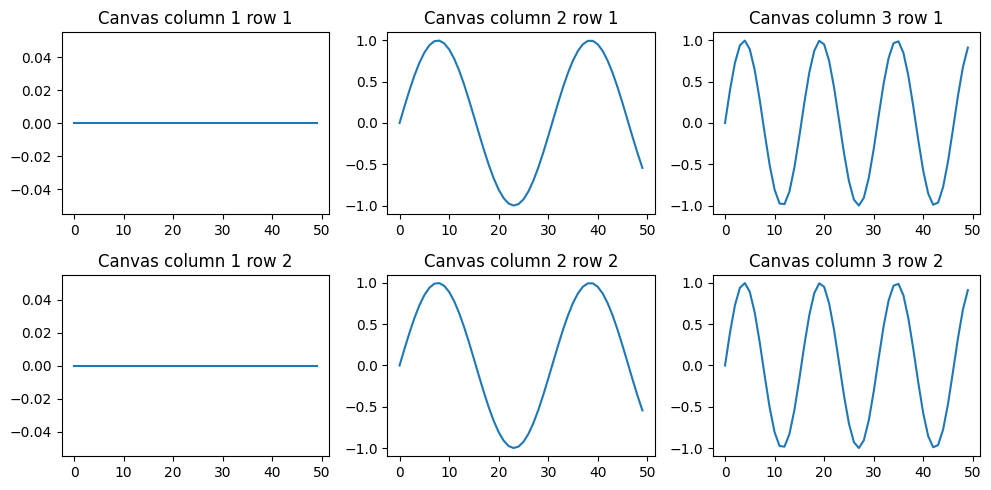

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for row, row_axes in enumerate(axes):
    for column, ax in enumerate(row_axes):
        ax.plot(np.sin(x*column))
        ax.set_title(f'Canvas column {column+1} row {row+1}')
fig.tight_layout()

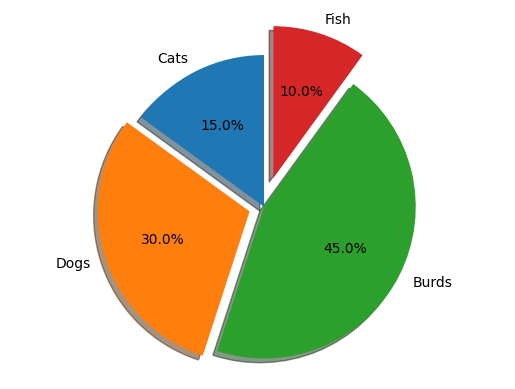

In [55]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cats', 'Dogs', 'Burds', 'Fish'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [56]:
ax1.pie?